In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.0)
sns.set_style("white")
sns.set_style("ticks")
palette = sns.color_palette('deep')
plt.style.use('dark_background')

df = pd.read_csv('data/data100m.csv')
df.columns=['Year', 'Time']
N = df.shape[0]

In [25]:
max_year, min_year = df['Year'].values.max() , df['Year'].values.min()

x = (df['Year'].values.reshape(N,1) - min_year)/(max_year - min_year)
t = df['Time'].values.reshape(N,1)
X_func = lambda u : np.hstack([np.ones((u.shape[0],1)), u , u**2, u**3])
X = X_func(x)

xgrid = np.linspace(0, 1, 100).reshape(100,1)
Xg = X_func(xgrid)
xi = xgrid*(max_year - min_year) + min_year
xi = xi.flatten()

# We will assume we 
sigma_hat = 0.5
M = 400
epsilon = np.random.randn(M, N) * sigma_hat
w_parameter = np.zeros((X.shape[1], M))
t_preds = np.zeros((100, M))

for j in range(0, M):
    epsilon_j = epsilon[j,:].reshape(N,1)
    t_j = t + epsilon_j
    w_j = np.linalg.inv(X.T @ X) @ X.T @ t_j
    w_parameter[:, j] = w_j.flatten()
    t_preds[:,j] = (Xg @ w_j).flatten()

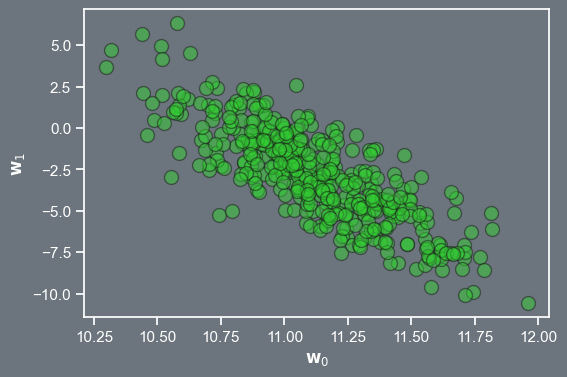

In [26]:
fig, ax = plt.subplots(figsize=(6,4))
ax.set_facecolor('#6C757D')
fig.patch.set_facecolor('#6C757D')
a, = plt.plot(w_parameter[0,:], w_parameter[1,:], 'o', color='limegreen', \
              label='Data', markeredgecolor='k', lw=1, ms=10, zorder=1, alpha=0.5)
plt.xlabel(r'$\mathbf{w}_0$')
plt.ylabel(r'$\mathbf{w}_1$')
plt.savefig('olympics_weights.png', dpi=150, bbox_inches='tight', facecolor="#6C757D")
plt.show()

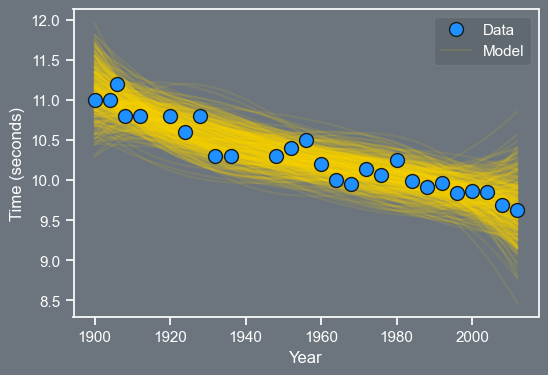

In [27]:
fig, ax = plt.subplots(figsize=(6,4))
ax.set_facecolor('#6C757D')
fig.patch.set_facecolor('#6C757D')
a, = plt.plot(df['Year'].values, df['Time'].values, 'o', color='dodgerblue', \
              label='Data', markeredgecolor='k', lw=1, ms=10, zorder=1)
c = plt.plot(xi, t_preds, '-', color='gold', alpha=0.1, zorder=0)
plt.xlabel('Year')
plt.ylabel('Time (seconds)')
plt.legend([a,c[0]], ['Data', 'Model'], framealpha=0.1)
plt.savefig('olympics_linear.png', dpi=150, bbox_inches='tight', facecolor="#6C757D")
plt.show()

In [23]:
## Predictive mean and covariance!
w_hat = np.linalg.inv(X.T @ X) @ X.T @ t
mean_t = (Xg @ w_hat).flatten()
cov_w = sigma_hat**2 * np.linalg.inv(X.T @ X)
cov_t = Xg @ cov_w @ Xg.T
std_t = np.sqrt(np.diag(cov_t)).flatten()

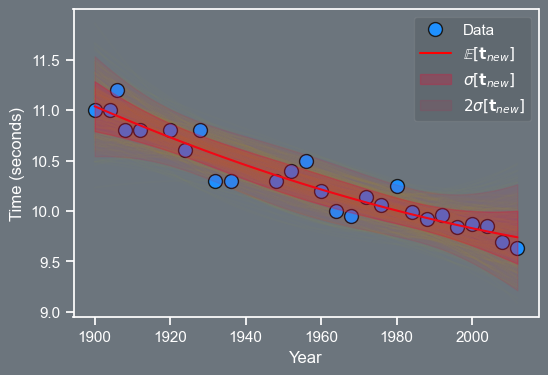

In [24]:
fig, ax = plt.subplots(figsize=(6,4))
ax.set_facecolor('#6C757D')
fig.patch.set_facecolor('#6C757D')
a, = plt.plot(df['Year'].values, df['Time'].values, 'o', color='dodgerblue', \
              label='Data', markeredgecolor='k', lw=1, ms=10, zorder=1)
c = plt.plot(xi, t_preds, '-', color='gold', alpha=0.01, zorder=0)
c, = plt.plot(xi, mean_t, '-', color='red', zorder=3)

d = plt.fill_between(xi, mean_t -std_t, mean_t + std_t, color='crimson', alpha=0.3, zorder=4)
e = plt.fill_between(xi, mean_t - 2 * std_t, mean_t + 2 * std_t, color='crimson', alpha=0.1, zorder=5)

plt.xlabel('Year')
plt.ylabel('Time (seconds)')
plt.legend([a,c,d, e], ['Data', r'$\mathbb{E}[\mathbf{t}_{new}]$', r'$\sigma[\mathbf{t}_{new}]$', r'$2 \sigma[\mathbf{t}_{new}]$'], framealpha=0.1)
plt.savefig('olympics_uncertainty.png', dpi=150, bbox_inches='tight', facecolor="#6C757D")
plt.show()